# Upper Confidence Bound (UCB)

UCB MAINLY FOCUSES ON EXLORATION RATHER THAN EXPLOITATION. IT PICK THE THING WHICH WILL GIVE HIGHEST ESTIMATED AWARD.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [13]:
import math
N = 10000 # no of users
d = 10 #variable for number of ads
ads_selected = []
numbers_of_selections = [0] * d #numbers of time a particular add is selected
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N): # 0 to N or 1 to N+1
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

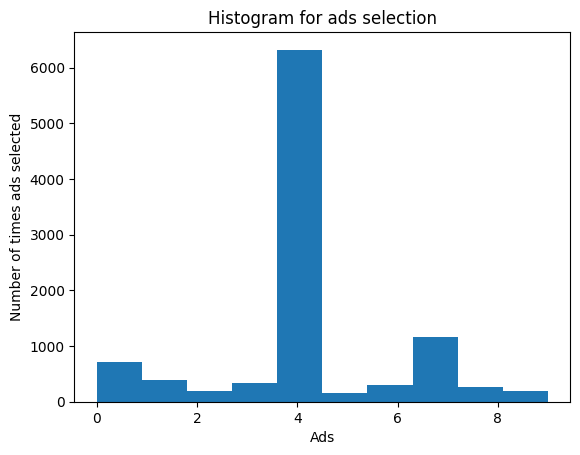

In [14]:
plt.hist(ads_selected)
plt.title('Histogram for ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times ads selected')
plt.show()

if we change n value, then result might change, for example n = 200, ucb algo would not be in position to predict the right prediction.